In [6]:
#Import Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from functools import partial
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#Download MNIST data
mnist = input_data.read_data_sets("MNIST_data/")

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [8]:
#Intialize Variables
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 150
n_hidden3 = 300
n_outputs = n_inputs
learning_rate = 0.01
l2 = 0.0001

In [9]:
l2_regul = tf.contrib.layers.l2_regularizer(l2)
he_init = tf.contrib.layers.variance_scaling_initializer()
dense_layar = partial(tf.layers.dense, activation=tf.nn.relu,
                     kernel_initializer=he_init, kernel_regularizer=l2_regul)

In [10]:
#Create Graph
input_layar = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden_layar1 = dense_layar(input_layar,n_hidden1)
hidden_layar2 = dense_layar(hidden_layar1, n_hidden2)
hidden_layar3 = dense_layar(hidden_layar2, n_hidden3)
output_layar = dense_layar(hidden_layar3, n_outputs)

In [11]:
#Optimizer
loss = tf.reduce_mean(tf.square(output_layar - input_layar))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

In [13]:
#Run tensorflow session
init = tf.global_variables_initializer()
saver = tf.train.Saver()
n_epochs = 5
batch_size = 150

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        n_batches = 5000
        for batch in range(n_batches):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            sess.run(train, feed_dict={input_layar:X_batch})
        loss_train = sess.run(loss, feed_dict={input_layar:X_batch})
        print("\r{}".format(epoch), "Train MSE:", loss_train) 
        saver.save(sess, "./my_model_all_layers.ckpt")  

('\r0', 'Train MSE:', 0.022578709)
('\r1', 'Train MSE:', 0.025543395)
('\r2', 'Train MSE:', 0.02431134)
('\r3', 'Train MSE:', 0.022199975)
('\r4', 'Train MSE:', 0.02308661)


In [14]:
def plot_image(image, shape=[28, 28]):
    plt.imshow(image.reshape(shape), cmap="Greys", interpolation="nearest")
    plt.axis("off")

def show_reconstructed_digits(outputs, model_path = None, n_test_digits = 4):
    with tf.Session() as sess:
        if model_path:
            saver.restore(sess, model_path)
        X_test = mnist.test.images[:n_test_digits]
        outputs_val = output_layar.eval(feed_dict={input_layar: X_test})

    fig = plt.figure(figsize=(8, 3 * n_test_digits))
    for digit_index in range(n_test_digits):
        plt.subplot(n_test_digits, 2, digit_index * 2 + 1)
        plot_image(X_test[digit_index])
        plt.subplot(n_test_digits, 2, digit_index * 2 + 2)
        plot_image(outputs_val[digit_index])

INFO:tensorflow:Restoring parameters from ./my_model_all_layers.ckpt


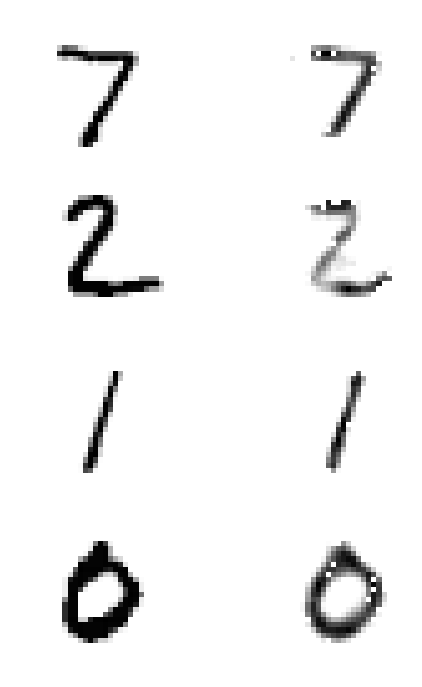

In [15]:
show_reconstructed_digits(output_layar, "./my_model_all_layers.ckpt")